In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
import json
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package wordnet to /home/arash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/arash/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df = pd.read_csv('data/Suicide_Detection.csv')

df = df[["text", "class"]]

df

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...
232069,If you don't like rock then your not going to ...,non-suicide
232070,You how you can tell i have so many friends an...,non-suicide
232071,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,The usual stuff you find hereI'm not posting t...,suicide


Number of 'suicide' tags: 116037
Number of 'non-suicide' tags: 116037


<Axes: ylabel='count'>

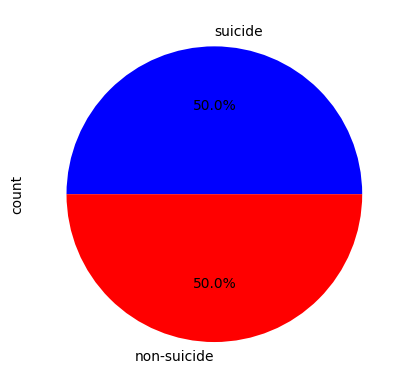

In [ ]:
suicide_count = df[df['class'] == "suicide"].shape[0]
non_suicide_count = df[df['class'] == "non-suicide"].shape[0]

print(f"Number of 'suicide' tags: {suicide_count}")
print(f"Number of 'non-suicide' tags: {non_suicide_count}")

df['class'].value_counts().plot.pie(autopct='%1.1f%%', labels=['suicide', 'non-suicide'], colors=['blue', 'red'])

In [ ]:
df['label'] = df['class'].apply(lambda x: 1 if x == 'suicide' else 0)

In [ ]:
display(f'Number of nulls in text  => {df["text"].isnull().sum()}')
display(f'Number of nulls in class => {df["class"].isnull().sum()}')

'Number of nulls in text  => 0'

'Number of nulls in class => 0'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=0)

In [ ]:
X_train_token = [word_tokenize(line) for line in X_train]
X_test_token  = [word_tokenize(line) for line in X_test]

lemmatizer = WordNetLemmatizer()
X_train_lemma = [[lemmatizer.lemmatize(word) for word in line] for line in X_train_token]
X_test_lemma  = [[lemmatizer.lemmatize(word) for word in line] for line in X_test_token]

X_train_clear = [[word for word in line if word not in stopwords.words('english')] for line in X_train_lemma]
X_test_clear  = [[word for word in line if word not in stopwords.words('english')] for line in X_test_lemma]




In [ ]:
print(X_train.shape)

(185659,)


In [ ]:
print(X_train)

72954     Long Distance relationship tips? So basically ...
103428    Beginning to give up on my girlfriendMy girlfr...
56933     Friend is suicidal. Please please help.My frie...
18662     Rapunzel isn’t my Valentine today Time to just...
8399      It’s been a long timeI’ve had a good streak fo...
                                ...                        
176963    Best idea is prob to kill myselfThinking about...
117952    I'm not in any immediate dangerBut on a scale ...
173685    Questioning morality I guess that title's pret...
43567     Life is awesome, but despite best efforts, i'm...
199340    Yea sex is cool but Have you ever tamed a wolf...
Name: text, Length: 185659, dtype: object


In [ ]:
n_train, n_test = X_train.shape[0], X_test.shape[0]

X_train_token = dict()
for x, line in tqdm(X_train.items(), total=n_train):
    X_train_token[x] = word_tokenize(line)

X_test_token = dict()
for x, line in tqdm(X_test.items(), total=n_test):
    X_test_token[x] = word_tokenize(line)

100%|██████████| 46415/46415 [01:11<00:00, 647.44it/s]


In [ ]:
lemmatizer = WordNetLemmatizer()

X_train_lemma = dict()
for x, line in tqdm(X_train_token.items(), total=n_train):
    X_train_lemma[x] = [lemmatizer.lemmatize(word) for word in line]

X_test_lemma = dict()
for x, line in tqdm(X_test_token.items(), total=n_test):
    X_test_lemma[x] = [lemmatizer.lemmatize(word) for word in line]

100%|██████████| 46415/46415 [00:40<00:00, 1153.92it/s]


In [ ]:
X_train_clear = dict()
for i, (x, line) in tqdm(enumerate(X_train_lemma.items()), total=n_train):
    X_train_clear[x] = [word for word in line if word not in stopwords.words('english')]

X_test_clear = dict()
for i, (x, line) in tqdm(enumerate(X_test_lemma.items()), total=n_test):
    X_test_clear[x] = [word for word in line if word not in stopwords.words('english')]

100%|██████████| 46415/46415 [13:34<00:00, 56.99it/s]


In [ ]:
X_train_clear_df = pd.DataFrame(X_train_clear.items(), columns=["id", "text"])
X_test_clear_df = pd.DataFrame(X_test_clear.items(), columns=["id", "text"])
X_test_clear_df["text"] = X_test_clear_df["text"].apply(json.dumps)
X_train_clear_df["text"] = X_train_clear_df["text"].apply(json.dumps)

In [ ]:
X_test_clear_df.to_csv("data/test_cleared.csv")
X_train_clear_df.to_csv("data/train_cleared.csv")
y_train.to_csv("data/train_labels.csv")
y_test.to_csv("data/test_labels.csv")

# Algorithms

After preprocessing, the dataset is saved in CSV files. Here, we load the datasets and we apply the algorithms

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from tqdm import tqdm
import json
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /home/arash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/arash/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
X_test_clear_df = pd.read_csv('data/test_cleared.csv', index_col=0)
X_test_clear_df["text"] = X_test_clear_df["text"].apply(json.loads)
y_test_df = pd.read_csv("data/test_labels.csv", index_col=0)

X_train_clear_df = pd.read_csv('data/train_cleared.csv', index_col=0)
X_train_clear_df["text"] = X_train_clear_df["text"].apply(json.loads)
y_train_df = pd.read_csv("data/train_labels.csv", index_col=0)

In [3]:
X_train_clear = [line for line in X_train_clear_df["text"]]
X_test_clear = [line for line in X_test_clear_df["text"]]
y_train = y_train_df["label"].tolist()
y_test = y_test_df["label"].tolist()

In [4]:
# Function to remove non-English characters
def remove_non_english_characters(text):
    # Retain only English letters, and spaces
    cleaned_text = re.sub(r'[^a-zA-Z\s\n\t]', '', text)
    return cleaned_text

X_train_clear = [[remove_non_english_characters(word) for word in text if remove_non_english_characters(word) != ""] for text in X_train_clear]
X_test_clear = [[remove_non_english_characters(word) for word in text if remove_non_english_characters(word) != ""] for text in X_test_clear]

In [5]:
vectorizer = TfidfVectorizer(preprocessor=' '.join)

X_train_vec = vectorizer.fit_transform(X_train_clear)

# Apply the vectorizer to the test dataset
X_test_vec = vectorizer.transform(X_test_clear)

print(f"Training TF-IDF shape: {X_train_vec.shape}")
print(f"Test TF-IDF shape: {X_test_vec.shape}")
print(vectorizer.get_feature_names_out())

display(X_test_vec.shape)

Training TF-IDF shape: (185659, 188241)
Test TF-IDF shape: (46415, 188241)
['AA' 'AAA' 'AAAA' ... 'zzzzzzzz' 'zzzzzzzzz'
 'zzzzzzzzzzzzzzxzzzzxzzzzzzzzzzzzz']


(46415, 188241)

# Simple Methods

## Logistic Regression

In [ ]:
# Train a model of logistic regression
clf = LogisticRegression().fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

In [ ]:
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
print(f"The results for Logistic Regression: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for Logistic Regression: accuracy 0.9353, precision 0.9443, recall: 0.9257, f1-score: 0.9349


## RNN

In [6]:
import torch.nn as nn
import torch

# Here is a simple implementation of the RNN model enabled by torch.

# Using super to use the net like a layer (inherit nn.Module)
class RNNNet(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.0, device="cpu"):
        super(RNNNet, self).__init__()
        # Define the layers of the network
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = 1
        self.device = device
        # Define the rnn layer here -- it can be RNN or LSTM.
        self.rnn_layer = nn.RNN(input_size=self.input_size,
                                hidden_size=self.hidden_size,
                                num_layers=self.num_layers,
                                dropout=dropout,
                                batch_first=True,
                                bidirectional=True)
        # self.fc = nn.Linear(2*self.hidden_size, self.hidden_size)
        self.output_layer = nn.Linear(2*self.hidden_size, 1)
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, x):

        # Initiate hidden layer h_0
        h0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_size, device=self.device)

        # Run the RNN layer
        out, _ = self.rnn_layer(x, h0)
        # Given input, we need to pass the input through the layers
        return self.sigmoid_layer(self.output_layer(out[:,-1,:]))


In [7]:
import gensim
import gensim.downloader
import torch

glove = gensim.downloader.load("glove-twitter-25")
vocab = glove.key_to_index
vectors = glove.vectors
embeddings = torch.tensor(vectors)

embedding_layer = nn.Embedding.from_pretrained(embeddings)
embedding_layer.weight.requires_grad = False

In [8]:
len(X_train_clear)

185659

In [11]:
X_train_seq = None
X_test_seq = None

len_words = 200
device = "cuda:1" if torch.cuda.is_available() else "cpu"

In [12]:
# Text to indices
train_indices= [[vocab[word] for word in document[:len_words] if word in glove] for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove] for document in X_test_clear]
print(train_indices[0])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
train_sequences = pad_sequence([torch.tensor(s) for s in train_indices], batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices], batch_first=True, padding_value=0)

print(train_sequences.shape)

[990, 4635, 3208, 616, 258, 1423, 1371, 1302, 653, 670, 813, 264, 435, 1371, 571, 463, 5239, 990, 717, 1423, 1030, 9950, 115, 5270, 813, 9950, 631, 1709, 635, 4635, 129, 2276, 922, 698, 410, 1210, 63, 137, 2512, 173, 574, 9950, 5270, 115, 463, 137, 2512, 173, 574, 1090, 726412, 3186, 182, 1709, 1948, 190, 182, 4709, 990, 635, 4635, 363, 990, 200, 515, 182, 68, 5270, 6707, 173, 1103]
torch.Size([185659, 200])


In [13]:
from torch.nn.utils.rnn import pad_sequence
# Now let's try the RNN model!
# RNN requires some computing resource, so let's move to GPU.

# Define the hyperparameters of model training
lr = 0.001 # Learning rate
epochs = 10 # Training epochs
batch_size = 256

print(vectors.shape)
# Initialize model
model = RNNNet(vectors.shape[-1], 128, device=device).to(device)
# model = RNNNet(X_train_seq.size())

# We use binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:

        optimizer.zero_grad()

        r_end = min(n_train, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is one hot dimension
        X_train_seq = embedding_layer(train_sequences[r_start: r_end].to(device)) # [N, L, H]
        predictions = model(X_train_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))

        loss.backward()
        optimizer.step()

        predicted = predictions.round().cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
    print(f"Epoch: {e}, loss: {total_loss/n_train}, acc:{n_correct/n_train}")
    losses.append(total_loss/len(X_train_clear))

(1193514, 25)
Epoch: 0, loss: 2.769883166491677, acc:0.4996041129166914
Epoch: 1, loss: 2.7698927166416243, acc:0.5003797284268471
Epoch: 2, loss: 2.7700916092807963, acc:0.49924323625571615
Epoch: 3, loss: 2.7699084071599263, acc:0.4995717956037682
Epoch: 4, loss: 2.7699068807796783, acc:0.4995717956037682
Epoch: 5, loss: 2.76990566473821, acc:0.4995717956037682
Epoch: 6, loss: 2.7699051778613746, acc:0.4995771818225887
Epoch: 7, loss: 2.7699047767879517, acc:0.4995771818225887
Epoch: 8, loss: 2.769904494392812, acc:0.4995771818225887
Epoch: 9, loss: 2.7699339742756424, acc:0.4997172235119224


In [16]:
with torch.no_grad():
    y_pred = list()
    r_start = 0
    n_test = len(X_test_clear)
    while r_start < n_test:
        r_end = min(n_test, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is embedding dimension
        X_test_seq = embedding_layer(test_sequences[r_start: r_end].to(device)) # [N, L, H]

        predictions = model(X_test_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        predicted = predictions.round().cpu()
        y_pred.extend(predicted.tolist())
        r_start += batch_size

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"The results for RNN: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for RNN: accuracy 0.5022, precision 0.5020, recall: 0.9986, f1-score: 0.6681


In [17]:
len(y_pred)

46415

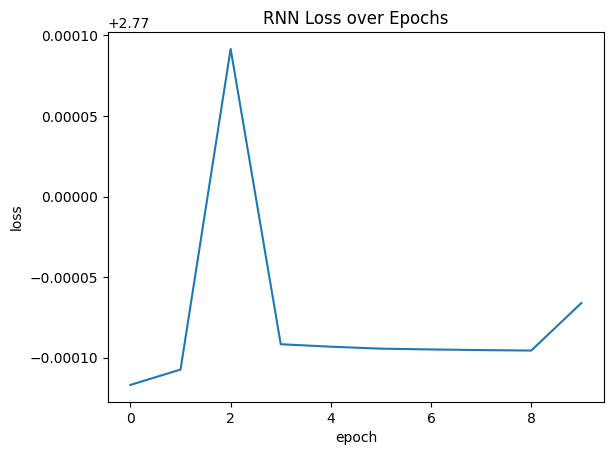

In [18]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("RNN Loss over Epochs")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### Testing with fewer words in each document

This is discussed in the paper as reducing the padding. We reduced the number of words to 30 (effectively reducing the padding in many documents)

In [89]:
X_train_seq = None
X_test_seq = None

len_words = 30

In [90]:
# Text to indices
train_indices= [[vocab[word] for word in document[:len_words] if word in glove] for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove] for document in X_test_clear]
print(train_indices[0])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence
train_sequences = pad_sequence([torch.tensor(s) for s in train_indices], batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices], batch_first=True, padding_value=0)

print(train_sequences.shape)

[990, 4635, 3208, 616, 258, 1423, 1371, 1302, 653, 670, 813, 264, 435, 1371, 571, 463, 5239, 990, 717, 1423, 1030, 9950, 115, 5270, 813, 9950, 631]
torch.Size([185659, 30])


In [92]:
from torch.nn.utils.rnn import pad_sequence
# Now let's try the RNN model!
# RNN requires some computing resource, so let's move to GPU.

# Define the hyperparameters of model training
lr = 0.001 # Learning rate
epochs = 10 # Training epochs
batch_size = 256

print(vectors.shape)
# Initialize model
model = RNNNet(vectors.shape[-1], 128, device=device).to(device)
# model = RNNNet(X_train_seq.size())

# We use binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:

        optimizer.zero_grad()

        r_end = min(n_train, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is one hot dimension
        X_train_seq = embedding_layer(train_sequences[r_start: r_end].to(device)) # [N, L, H]
        predictions = model(X_train_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))

        loss.backward()
        optimizer.step()

        predicted = predictions.round().cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
    print(f"Epoch: {e}, loss: {total_loss/n_train}, acc:{n_correct/n_train}")
    losses.append(total_loss/len(X_train_clear))

(1193514, 25)
Epoch: 0, loss: 2.7248558186740692, acc:0.654845711761886
Epoch: 1, loss: 2.760314348261395, acc:0.533332615170824
Epoch: 2, loss: 2.760284796629159, acc:0.533456498203696
Epoch: 3, loss: 2.7601644791225795, acc:0.5338550783964149
Epoch: 4, loss: 2.760122869439789, acc:0.5340058925233897
Epoch: 5, loss: 2.76012124032557, acc:0.534059754711595
Epoch: 6, loss: 2.760107766847456, acc:0.5341190031186207
Epoch: 7, loss: 2.7600750742678835, acc:0.5342374999326722
Epoch: 8, loss: 2.759576961253575, acc:0.5360472694563689
Epoch: 9, loss: 2.7385732650664374, acc:0.6774462859328123


In [93]:
with torch.no_grad():
    y_pred = list()
    r_start = 0
    n_test = len(X_test_clear)
    while r_start < n_test:
        r_end = min(n_test, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is embedding dimension
        X_test_seq = embedding_layer(test_sequences[r_start: r_end].to(device)) # [N, L, H]

        predictions = model(X_test_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        predicted = predictions.round().cpu()
        y_pred.extend(predicted.tolist())
        r_start += batch_size

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"The results for RNN: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for RNN: accuracy 0.6889, precision 0.7246, recall: 0.6129, f1-score: 0.6641


As it is evident, reducing the number of words in each document (effectively lowering the padding) in the training of the RNN model improves the accuracy.

We get to Run with fewer words per document than 50 and the results even improved more!!! Because of time constraints and lengthy run of this dataset we couldn't properly do every experiment that we desired. 

## LSTM

In [55]:
import torch.nn as nn
import torch

class LSTMNet(nn.Module):
    def __init__(self, input_size, hidden_size, dropout=0.0, device="cpu"):
        super(LSTMNet, self).__init__()

        # Define the layers of the network
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = 2
        self.device = device

        self.lstm_layer = nn.LSTM(input_size=self.input_size,
                                hidden_size=self.hidden_size,
                                num_layers=self.num_layers,
                                dropout=dropout,
                                batch_first=True,
                                bidirectional=True)
        self.output_layer = nn.Linear(2*self.hidden_size, 1)
        self.sigmoid_layer = nn.Sigmoid()

    def forward(self, x):
        # Initiate hidden layer h_0
        h0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_size, device=self.device)
        c0 = torch.zeros(2*self.num_layers, x.size(0), self.hidden_size, device=self.device)

        out, _ = self.lstm_layer(x, (h0, c0))

        return self.sigmoid_layer(self.output_layer(out[:,-1,:]))

In [56]:
X_train_seq = None
X_test_seq = None

len_words = 200

# Text to indices
train_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                 for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                for document in X_test_clear]
print(train_indices[0])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

train_sequences = pad_sequence([torch.tensor(s) for s in train_indices],
                               batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices],
                              batch_first=True, padding_value=0)

print(train_sequences.shape)

[990, 4635, 3208, 616, 258, 1423, 1371, 1302, 653, 670, 813, 264, 435, 1371, 571, 463, 5239, 990, 717, 1423, 1030, 9950, 115, 5270, 813, 9950, 631, 1709, 635, 4635, 129, 2276, 922, 698, 410, 1210, 63, 137, 2512, 173, 574, 9950, 5270, 115, 463, 137, 2512, 173, 574, 1090, 726412, 3186, 182, 1709, 1948, 190, 182, 4709, 990, 635, 4635, 363, 990, 200, 515, 182, 68, 5270, 6707, 173, 1103]
torch.Size([185659, 200])


In [60]:
from torch.nn.utils.rnn import pad_sequence
# Define the hyperparameters of model training
lr = 0.001 # Learning rate
epochs = 100 # Training epochs
batch_size = 256

print(vectors.shape)
# Initialize model
model = LSTMNet(vectors.shape[-1], 128, device=device).to(device)

# Binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)

(1193514, 25)


In [61]:
# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:

        optimizer.zero_grad()

        r_end = min(n_train, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is one hot dimension
        X_train_seq = embedding_layer(train_sequences[r_start: r_end].to(device)) # [N, L, H]

        predictions = model(X_train_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))

        loss.backward()
        optimizer.step()

        predicted = predictions.round().cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
    print(f"Epoch: {e}, loss: {total_loss/n_train}, acc:{n_correct/n_train}")
    losses.append(total_loss/len(X_train_clear))

Epoch: 0, loss: 2.7697403626557042, acc:0.49999192067176923
Epoch: 1, loss: 2.769896915091365, acc:0.49972799594956346
Epoch: 2, loss: 2.769885974334386, acc:0.49985187898243555
Epoch: 3, loss: 2.698741841647155, acc:0.7259761175057498
Epoch: 4, loss: 2.640079513351816, acc:0.8735854442822594
Epoch: 5, loss: 2.6336540590489803, acc:0.8877889033119859
Epoch: 6, loss: 2.630204147882864, acc:0.8951841817525679
Epoch: 7, loss: 2.6296282705946497, acc:0.8968108198363667
Epoch: 8, loss: 2.6261620859976795, acc:0.9041953258393075
Epoch: 9, loss: 2.6244354985676788, acc:0.9079549065760345
Epoch: 10, loss: 2.6231233266214113, acc:0.9103733188264507
Epoch: 11, loss: 2.6220320152480907, acc:0.9135996638999456
Epoch: 12, loss: 2.6210564785673385, acc:0.9155009991435912
Epoch: 13, loss: 2.6200243549469073, acc:0.9178170732364173
Epoch: 14, loss: 2.6189562630536907, acc:0.9201977819550897
Epoch: 15, loss: 2.6181468350403976, acc:0.9219267581964785
Epoch: 16, loss: 2.6272336216979797, acc:0.901469899

KeyboardInterrupt: 

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


with torch.no_grad():
    y_pred = list()
    r_start = 0
    n_test = len(X_test_clear)
    while r_start < n_test:
        r_end = min(n_test, r_start+batch_size)

        # N is number of items
        # L is length of a sequence
        # H is embedding dimension
        X_test_seq = embedding_layer(test_sequences[r_start: r_end].to(device)) # [N, L, H]

        predictions = model(X_test_seq) # [N, 1]
        predictions = torch.squeeze(predictions)
        predicted = predictions.round().cpu()
        y_pred.extend(predicted.tolist())
        r_start += batch_size

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"The results for LSTM: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for LSTM: accuracy 0.9141, precision 0.9168, recall: 0.9117, f1-score: 0.9142


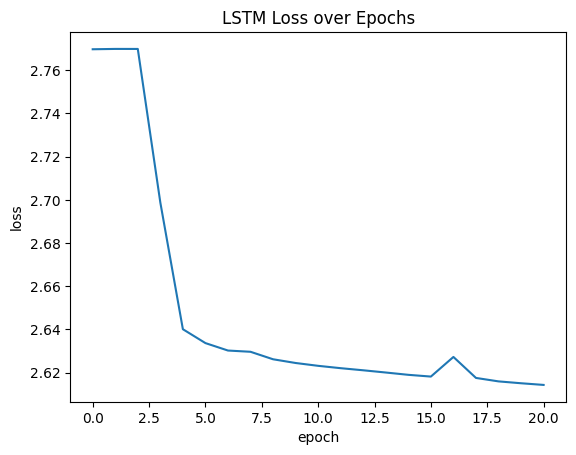

In [63]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("LSTM Loss over Epochs")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

### Increasing the number of the words per document to 500

In this experiment we want to see the effect of increasing the number of words in documents to 500 words. In most documents this leads to effectively increasing the size of the padding as many documents are very short.

In [64]:
X_train_seq = None
X_test_seq = None

len_words = 500

# Text to indices
train_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                 for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                for document in X_test_clear]
print(train_indices[0])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence

train_sequences = pad_sequence([torch.tensor(s) for s in train_indices],
                               batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices],
                              batch_first=True, padding_value=0)

print(train_sequences.shape)

[990, 4635, 3208, 616, 258, 1423, 1371, 1302, 653, 670, 813, 264, 435, 1371, 571, 463, 5239, 990, 717, 1423, 1030, 9950, 115, 5270, 813, 9950, 631, 1709, 635, 4635, 129, 2276, 922, 698, 410, 1210, 63, 137, 2512, 173, 574, 9950, 5270, 115, 463, 137, 2512, 173, 574, 1090, 726412, 3186, 182, 1709, 1948, 190, 182, 4709, 990, 635, 4635, 363, 990, 200, 515, 182, 68, 5270, 6707, 173, 1103]
torch.Size([185659, 500])


In [66]:
from torch.nn.utils.rnn import pad_sequence

# Define the hyperparameters of model training
lr = 0.001  # Learning rate
epochs = 10  # Training epochs
batch_size = 128

print(vectors.shape)
# Initialize model
model = LSTMNet(vectors.shape[-1], 128, device=device).to(device)

# Binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.Tensor(y_train)
y_test_tensor = torch.Tensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)
# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:
        optimizer.zero_grad()

        r_end = min(n_train, r_start + batch_size)

        # N is number of items
        # L is length of a sequence
        # H is one hot dimension
        X_train_seq = embedding_layer(
            train_sequences[r_start: r_end].to(device))  # [N, L, H]

        predictions = model(X_train_seq)  # [N, 1]
        predictions = torch.squeeze(predictions)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))

        loss.backward()
        optimizer.step()

        predicted = predictions.round().cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
    print(
        f"Epoch: {e}, loss: {total_loss / n_train}, acc:{n_correct / n_train}")
    losses.append(total_loss / len(X_train_clear))

(1193514, 25)
Epoch: 0, loss: 2.423753755755088, acc:0.5012307510004902
Epoch: 1, loss: 2.4237353593472695, acc:0.49871000059248405
Epoch: 2, loss: 2.4213165202577502, acc:0.5081251110907632
Epoch: 3, loss: 2.4199586838832303, acc:0.5206157525355625
Epoch: 4, loss: 2.42375576556031, acc:0.5004389768338728
Epoch: 5, loss: 2.423755090228278, acc:0.5004389768338728
Epoch: 6, loss: 2.405771004339425, acc:0.5562940660027255
Epoch: 7, loss: 2.3277713264286697, acc:0.7921996779041145
Epoch: 8, loss: 2.3866919327351375, acc:0.6115458986636791
Epoch: 9, loss: 2.36658170325084, acc:0.6741553062334711


As it is evident, LSTM model has much trouble to converge to a good point. We hypothesize that the reason is the very large padding that is at the end of each document.

# CNN

In [67]:
class CNN(nn.Module):
    def __init__(self,  embedding_dim, num_filters, filter_sizes, num_classes, embedding_layer):
        super(CNN, self).__init__()
        # Define the layers of the network
        self.embedding_layer = embedding_layer
        self.convs = nn.ModuleList([
            nn.Conv1d(in_channels=embedding_dim, out_channels=num_filters, kernel_size=k)
            for k in filter_sizes
        ])
        self.fc = nn.Linear(num_filters * len(filter_sizes), 128)
        self.fc2 = nn.Linear(128, num_classes)
        
        
    def forward(self, input):
        # Given input, we need to pass the input through the layers
        embedded = self.embedding_layer(input)
        embedded = embedded.permute(0, 2, 1) # Adjust for 1D convolution
        conv_x = [torch.relu(conv(embedded)) for conv in self.convs]
        pool_x = [nn.functional.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in conv_x]
        pool_x = torch.cat(pool_x, 1)
        res = self.fc(pool_x)
        res = self.fc2(nn.functional.relu(res))
        return res

In [68]:
X_train_seq = None
X_test_seq = None

len_words = 200

# Text to indices
train_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                 for document in X_train_clear]
test_indices = [[vocab[word] for word in document[:len_words] if word in glove]
                for document in X_test_clear]
print(train_indices[100])

# First pad the input to the same length as torch needs to process multi-
# dimensional vectors
from torch.nn.utils.rnn import pad_sequence

train_sequences = pad_sequence([torch.tensor(s) for s in train_indices],
                               batch_first=True, padding_value=0)
test_sequences = pad_sequence([torch.tensor(s) for s in test_indices],
                              batch_first=True, padding_value=0)
lengths = [max(len(s), 1) for s in train_indices]
print(train_sequences.shape)

[9950, 272, 226, 211, 6832, 338, 363, 9950, 245, 81988, 338, 196, 258, 569, 1948, 597, 1024, 1948, 258, 1302, 9950, 232, 744, 272, 582, 1697, 1213]
torch.Size([185659, 200])


In [74]:
train_sequences[100]

tensor([ 9950,   272,   226,   211,  6832,   338,   363,  9950,   245, 81988,
          338,   196,   258,   569,  1948,   597,  1024,  1948,   258,  1302,
         9950,   232,   744,   272,   582,  1697,  1213,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0, 

In [70]:
from torch.nn.utils.rnn import pad_sequence
# Now let's try the RNN model!
# RNN requires some computing resource, so let's move to GPU.
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

# Define the hyperparameters of model training
lr = 0.001 # Learning rate
epochs = 50 # Training epochs
batch_size = 512

print(vectors.shape)
# Initialize model
# model = RNNNet(vectors.shape[-1], 128,  device=device).to(device)
model = CNN(vectors.shape[1], 4, [1,2,3,4,5], 2, embedding_layer).to(device)
# model = RNNNet(X_train_seq.size())

# We use binary cross entropy as the loss
loss_func = nn.CrossEntropyLoss()

# Using Adam as the optimizer.
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# Putting labels in tensors
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)
losses = []
n_train = train_sequences.shape[0]
embedding_layer = embedding_layer.to(device)

# Repeat the learning process for the number of epochs
for e in range(epochs):
    r_start = 0
    n_correct = 0
    b = 0
    total_loss = 0
    while r_start < n_train:
        
        optimizer.zero_grad()
        
        r_end = min(n_train, r_start+batch_size)
        
        # N is number of items1
        # L is length of a sequence
        # H is glove dimension
        # X_train_seq = embedding_layer(train_sequences[r_start: r_end].to(device))
        # predictions = model(X_train_seq, lengths[r_start: r_end])  # Modify model to handle packed sequences
        X = train_sequences[r_start:r_end].to(device)
        predictions = model(X)
        predictions = predictions.squeeze().softmax(dim=1)
        loss = loss_func(predictions, y_train_tensor[r_start:r_end].to(device))
    
        loss.backward()
        optimizer.step()
        predicted = torch.argmax(predictions.round(), dim = 1).cpu()
        n_correct += (predicted == y_train_tensor[r_start:r_end]).sum().item()
        r_start += batch_size
        total_loss += loss.item()
        b += 1
        if (b+1) % 1000 == 0:
            print(n_correct / (b+1))
    print(f"Epoch: {e}, loss: {total_loss/n_train}, acc:{n_correct/n_train}")
    losses.append(total_loss/len(X_train_clear))

(1193514, 25)
Epoch: 0, loss: 0.0009315671681483265, acc:0.8360596577596562
Epoch: 1, loss: 0.0008489183743615831, acc:0.8741132937266709
Epoch: 2, loss: 0.0008350365320838047, acc:0.8812177163509445
Epoch: 3, loss: 0.0008274851895265256, acc:0.8856936641908014
Epoch: 4, loss: 0.0008224447926756403, acc:0.8885214290715775
Epoch: 5, loss: 0.0008185773453684135, acc:0.8906705303809672
Epoch: 6, loss: 0.0008148693426289273, acc:0.8929866044737933
Epoch: 7, loss: 0.0008122385404089653, acc:0.8943331591789248
Epoch: 8, loss: 0.0008101827965680405, acc:0.8957766658228257
Epoch: 9, loss: 0.0008085685058978674, acc:0.8968108198363667
Epoch: 10, loss: 0.00080733878331451, acc:0.8976241388782661
Epoch: 11, loss: 0.0008064701094805187, acc:0.8981250572285749
Epoch: 12, loss: 0.000806458031978571, acc:0.8980873536968312
Epoch: 13, loss: 0.0008065246294358153, acc:0.8976726148476508
Epoch: 14, loss: 0.000807749034091475, acc:0.897090903215034
Epoch: 15, loss: 0.0008092663191726307, acc:0.8958251417

In [71]:
with torch.no_grad():
    y_pred = list()
    r_start = 0
    n_test = len(X_test_clear)
    while r_start < n_test:
        r_end = min(n_test, r_start+batch_size)
        
        # N is number of items
        # L is length of a sequence
        # H is embedding dimension
        X_test_seq = embedding_layer(test_sequences[r_start: r_end].to(device)) # [N, L, H]
        
        predictions = model(test_sequences[r_start: r_end].to(device)) # [N, 1]
        predictions = predictions.squeeze().softmax(dim=1)
        predicted = torch.argmax(predictions.round(), dim = 1).cpu()
        y_pred.extend(predicted.tolist())
        r_start += batch_size

acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"The results for RNN: accuracy {acc:.4f}, precision {precision:.4f}, recall: {recall:.4f}, f1-score: {f1:.4f}")

The results for RNN: accuracy 0.8927, precision 0.9004, recall: 0.8840, f1-score: 0.8921


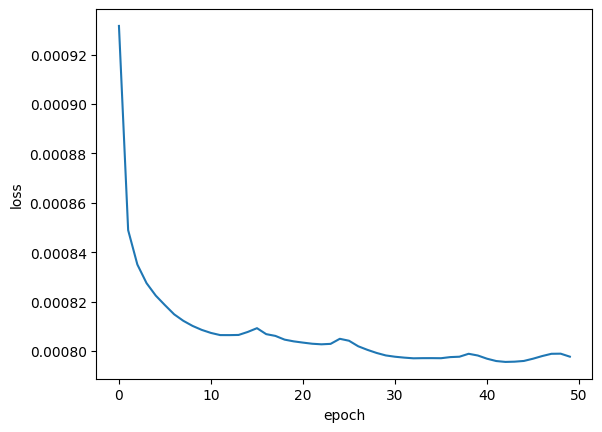

In [72]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()